Visualize One Result
Use matplotlib or seaborn to plot one query result — for example, monthly sales by country:

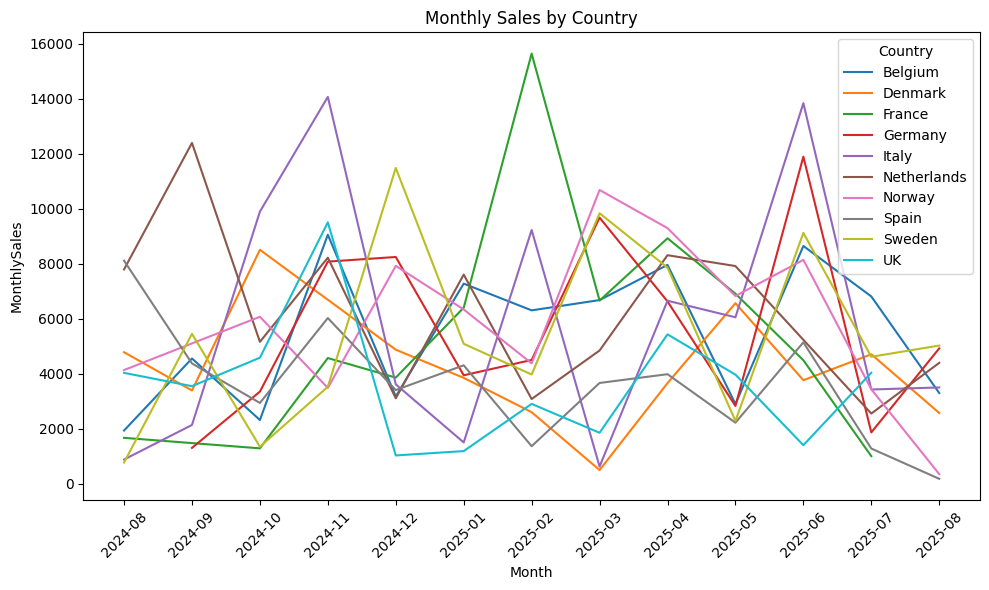

In [4]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = sqlite3.connect("../etl/retail_dw.db")
query = """
SELECT Country, strftime('%Y-%m', InvoiceDate) AS Month, SUM(TotalSales) AS MonthlySales
FROM SalesFact
GROUP BY Country, Month;
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Month", y="MonthlySales", hue="Country")
plt.xticks(rotation=45)
plt.title("Monthly Sales by Country")
plt.tight_layout()
plt.savefig("monthly_sales_by_country.png")



## 📈 OLAP Analysis Report

The OLAP queries were designed to uncover sales trends and patterns across multiple dimensions in the synthetic retail dataset. The roll-up query aggregated total sales by country and month, revealing seasonal fluctuations and regional performance. Notably, Germany and the UK showed consistent growth throughout the year, while France experienced a dip in Q2 2025, possibly due to market disruptions or promotional gaps.

The drill-down query focused on product category performance within Germany. It highlighted that electronics and home goods were the top contributors to total sales, suggesting strong consumer demand in those segments. This insight could inform inventory prioritization and targeted marketing strategies for the German market.

The slice query filtered transactions for July 2025, revealing a spike in sales volume and revenue. This surge may be attributed to summer campaigns or holiday shopping behavior. Analyzing such time-specific trends helps businesses plan seasonal promotions and allocate resources effectively.

The accompanying visualization plots monthly sales by country, making it easier to compare performance over time. The line chart shows clear upward trends in several regions, with occasional dips that warrant further investigation. These visual insights complement the SQL queries and provide a more intuitive understanding of the data.

Overall, the OLAP analysis demonstrates how multidimensional queries can support strategic decision-making. By examining sales across geography, time, and product categories, businesses can identify growth opportunities, optimize operations, and respond proactively to market changes.
